In [1]:
# Imports
%matplotlib inline
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'
df = pd.read_excel('ethnicity.xlsx')
df.head()

,ZIP,YEAR,ETHNICITY,POPULATION
0,91901,2010,American Indian,266
1,91901,2010,Asian,328
2,91901,2010,Black,184
3,91901,2010,Hispanic,2690
4,91901,2010,Other,10


In [2]:
df2018 = df[df['YEAR']==2018]
df2018 = df2018[df2018['POPULATION']>0]
df2018.head()

,ZIP,YEAR,ETHNICITY,POPULATION
64,91901,2018,American Indian,124
65,91901,2018,Asian,561
66,91901,2018,Black,303
67,91901,2018,Hispanic,2945
68,91901,2018,Other,49


In [3]:
final = df2018.groupby('ZIP')['POPULATION'].max()
final

ZIP
91901    13283
91902     8768
91905      999
91906     1870
91910    51744
         ...  
92155      615
92173    25391
92182     1349
92536      322
92672     2330
Name: POPULATION, Length: 111, dtype: int64

In [4]:
ethnicities = []
for i in range(len(final)):
    temp = df2018[df2018['ZIP']==final.index[i]]
    temp2 = temp[temp['POPULATION']==final.iloc[i]]
    ethnicities.append(temp2['ETHNICITY'].iloc[0])
ethnicities

['White',
 'Hispanic',
 'White',
 'White',
 'Hispanic',
 'Hispanic',
 'Hispanic',
 'Hispanic',
 'Hispanic',
 'White',
 'White',
 'White',
 'Hispanic',
 'White',
 'White',
 'White',
 'White',
 'Hispanic',
 'White',
 'Hispanic',
 'White',
 'White',
 'Hispanic',
 'White',
 'Hispanic',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'Hispanic',
 'White',
 'Hispanic',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'Hispanic',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'Hispanic',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'Hispanic',
 'Hispanic',
 'White',
 'White',
 'White',
 'White',
 'White',
 'Hispanic',
 'White',
 'White',
 'Hispanic',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'Hispanic',
 'Hispanic',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'Asian

In [5]:
ethn = pd.DataFrame(data={'ZIP': df2018['ZIP'].unique(), 'Majority Ethnicity': ethnicities})
ethn

,ZIP,Majority Ethnicity
0,91901,White
1,91902,Hispanic
2,91905,White
3,91906,White
4,91910,Hispanic
...,...,...
106,92155,White
107,92173,Hispanic
108,92182,White
109,92536,White


In [6]:
ethn

,ZIP,Majority Ethnicity
0,91901,White
1,91902,Hispanic
2,91905,White
3,91906,White
4,91910,Hispanic
...,...,...
106,92155,White
107,92173,Hispanic
108,92182,White
109,92536,White


In [7]:
#ethn.to_excel("Majority Ethnicities By Zip Code.xlsx")

In [8]:
#American Indian Population Proportion
df2018.head()

,ZIP,YEAR,ETHNICITY,POPULATION
64,91901,2018,American Indian,124
65,91901,2018,Asian,561
66,91901,2018,Black,303
67,91901,2018,Hispanic,2945
68,91901,2018,Other,49


In [9]:
pop = df2018.groupby('ZIP')['POPULATION'].sum()
pop

ZIP
91901    17885
91902    17375
91905     2014
91906     3686
91910    82682
         ...  
92155     1032
92173    27741
92182     2222
92536      491
92672     4529
Name: POPULATION, Length: 111, dtype: int64

In [10]:
df2018['ETHNICITY'].unique()

array(['American Indian', 'Asian', 'Black', 'Hispanic', 'Other',
       'Pacific Islander', 'Two or More', 'White'], dtype=object)

In [11]:
amin = df2018[df2018['ETHNICITY']=='American Indian']
ethA = df2018[df2018['ETHNICITY'] == 'Asian']
ethB = df2018[df2018['ETHNICITY'] == 'Black']
ethH = df2018[df2018['ETHNICITY'] == 'Hispanic']
ethO = df2018[df2018['ETHNICITY'] == 'Other']
ethPI = df2018[df2018['ETHNICITY'] == 'Pacific Islander']
ethTM = df2018[df2018['ETHNICITY'] == 'Two or More']
ethW = df2018[df2018['ETHNICITY'] == 'White']

ethW

,ZIP,YEAR,ETHNICITY,POPULATION
71,91901,2018,White,13283
143,91902,2018,White,5119
215,91905,2018,White,999
287,91906,2018,White,1870
359,91910,2018,White,18633
...,...,...,...,...
7703,92155,2018,White,615
7847,92173,2018,White,1273
7919,92182,2018,White,1349
8063,92536,2018,White,322


In [12]:
def prop(df):
    props = []
    for i in range(len(df)):
        zipc = df.iloc[i]['ZIP']
        if zipc in pop.index:
            props.append(df.iloc[i]['POPULATION']/pop[zipc])
        else:
            continue
    df['PROPORTION'] = props
    return 

In [13]:
prop(amin)
prop(ethA)
prop(ethB)
prop(ethH)
prop(ethO)
prop(ethPI)
prop(ethTM)
prop(ethW)
ethW

,ZIP,YEAR,ETHNICITY,POPULATION,PROPORTION
71,91901,2018,White,13283,0.742689
143,91902,2018,White,5119,0.294619
215,91905,2018,White,999,0.496028
287,91906,2018,White,1870,0.507325
359,91910,2018,White,18633,0.225357
...,...,...,...,...,...
7703,92155,2018,White,615,0.595930
7847,92173,2018,White,1273,0.045889
7919,92182,2018,White,1349,0.607111
8063,92536,2018,White,322,0.655804


In [14]:

amin = amin.drop(['YEAR', 'ETHNICITY', 'POPULATION'], axis=1)
amin

,ZIP,PROPORTION
64,91901,0.006933
136,91902,0.003108
208,91905,0.016385
280,91906,0.014107
352,91910,0.002939
...,...,...
7696,92155,0.009690
7840,92173,0.003172
7912,92182,0.000900
8056,92536,0.040733


In [15]:
amin.to_excel("American Indian Population Proportion by Zip Code.xlsx")

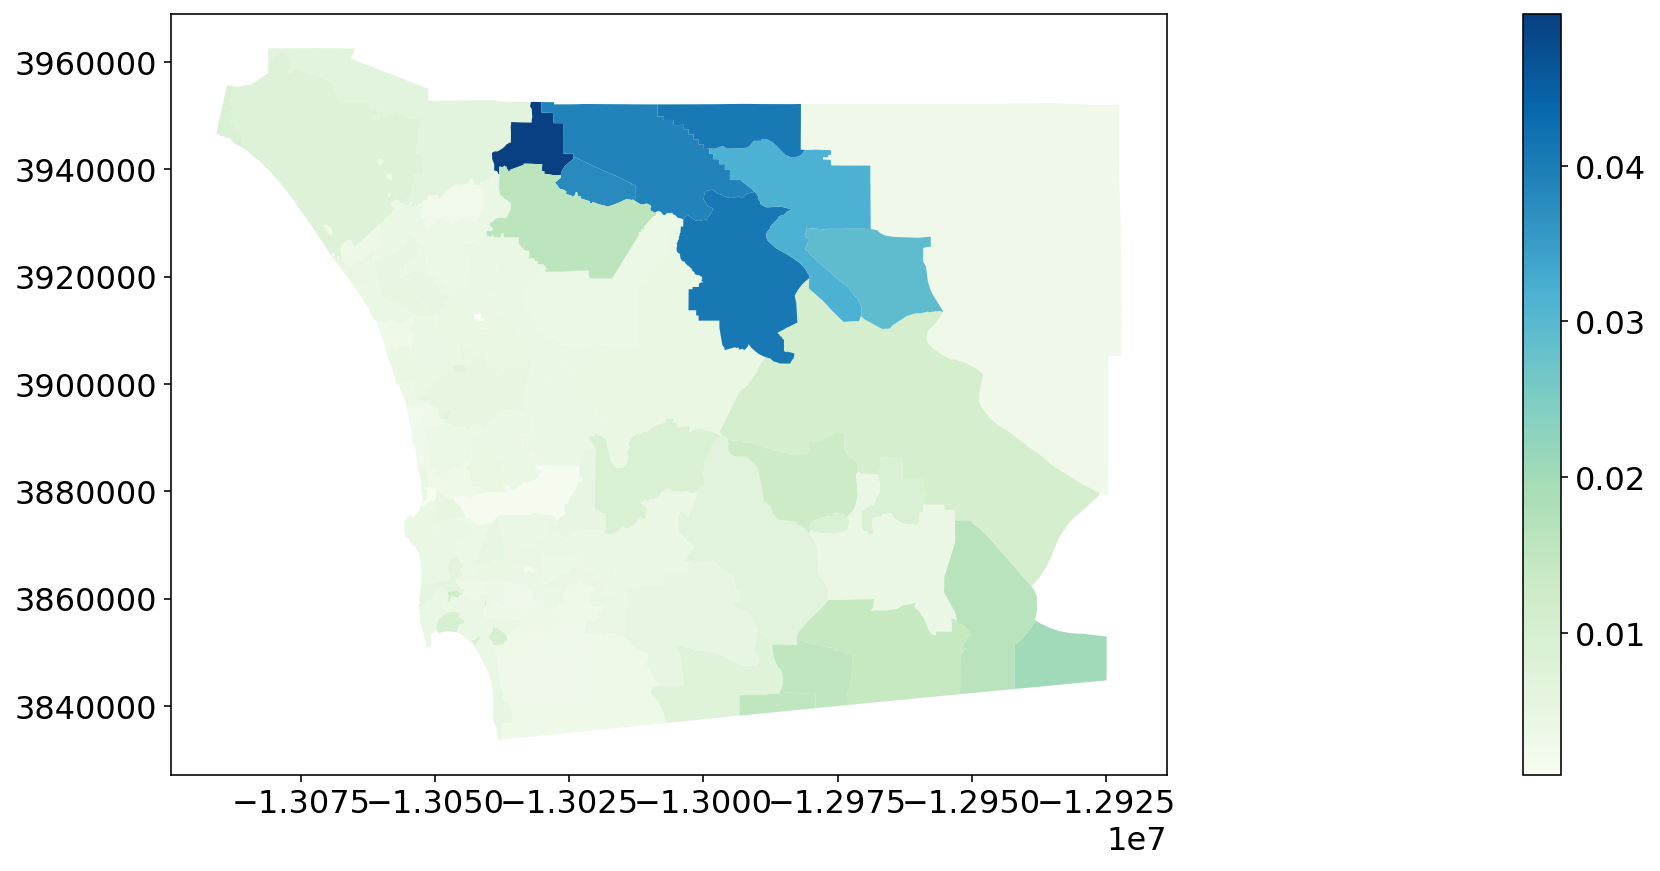

In [16]:
#African American
filepath2 = "CENSUS-Data/Census_ZIP.shp"
tempmap2 = gpd.read_file(filepath2)


fig2, ax2 = plt.subplots(1, 1, figsize=(17, 7))
divider2 = make_axes_locatable(ax2)
sdmap2= pd.merge(tempmap2, amin, on='ZIP', how='left')
sdmap2 = sdmap2.dropna()
sdmap2.plot(column='PROPORTION', ax=ax2, cmap='GnBu', legend=True);

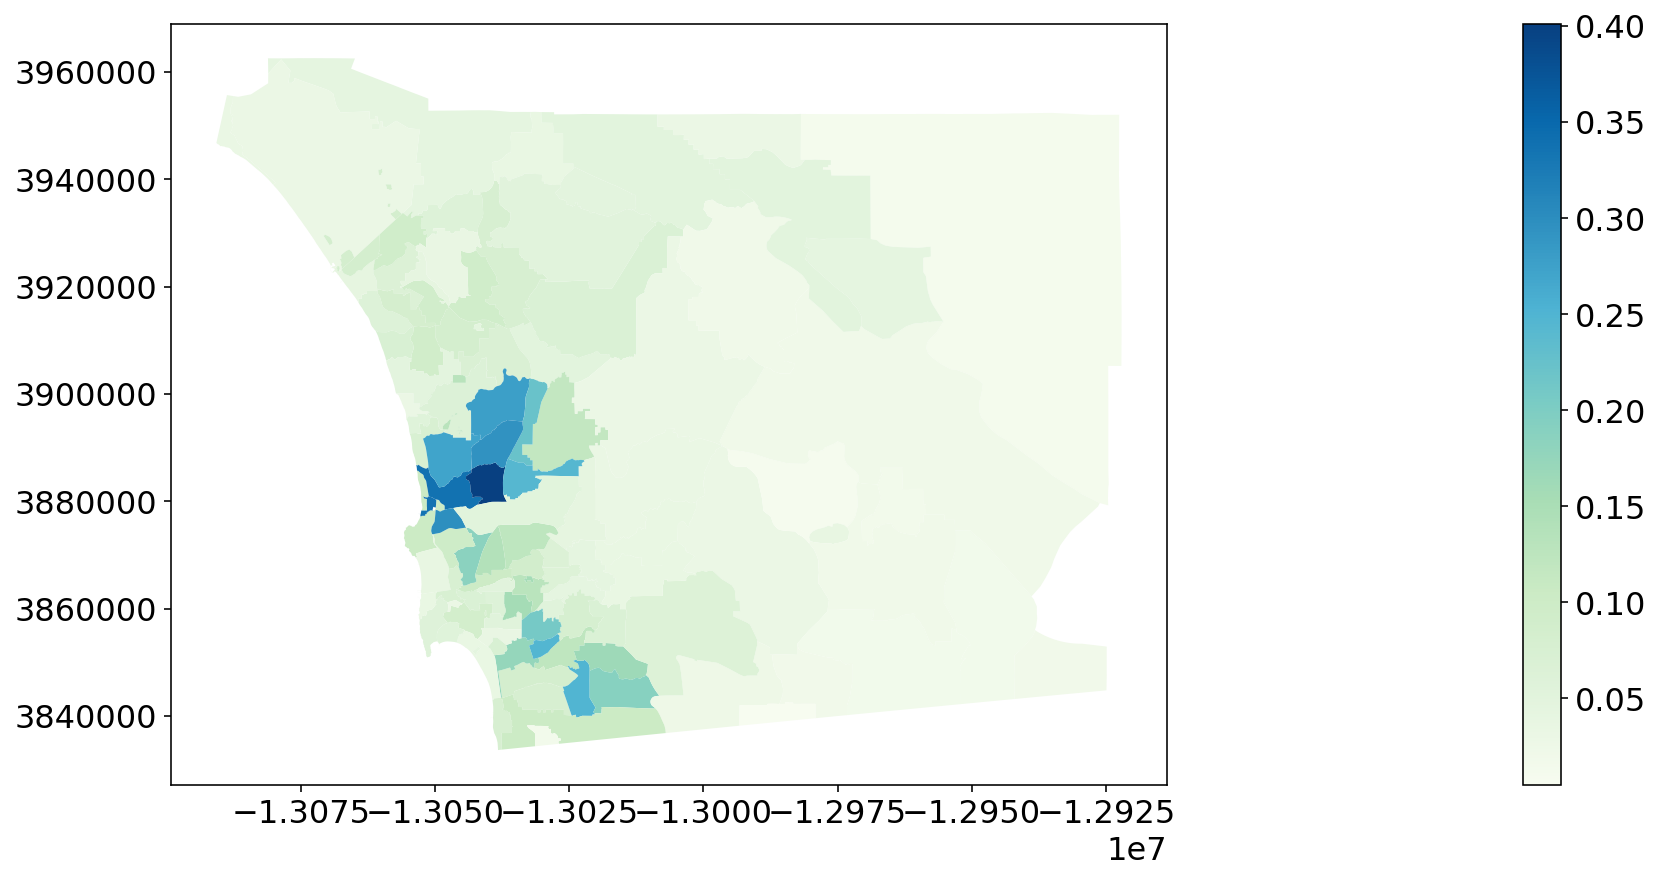

In [17]:
#Asian
filepath3 = "CENSUS-Data/Census_ZIP.shp"
tempmap3 = gpd.read_file(filepath3)


fig3, ax3 = plt.subplots(1, 1, figsize=(17, 7))
divider3 = make_axes_locatable(ax3)
sdmap3= pd.merge(tempmap3, ethA, on='ZIP', how='left')
sdmap3 = sdmap3.dropna()
sdmap3.plot(column='PROPORTION', ax=ax3, cmap='GnBu', legend=True);

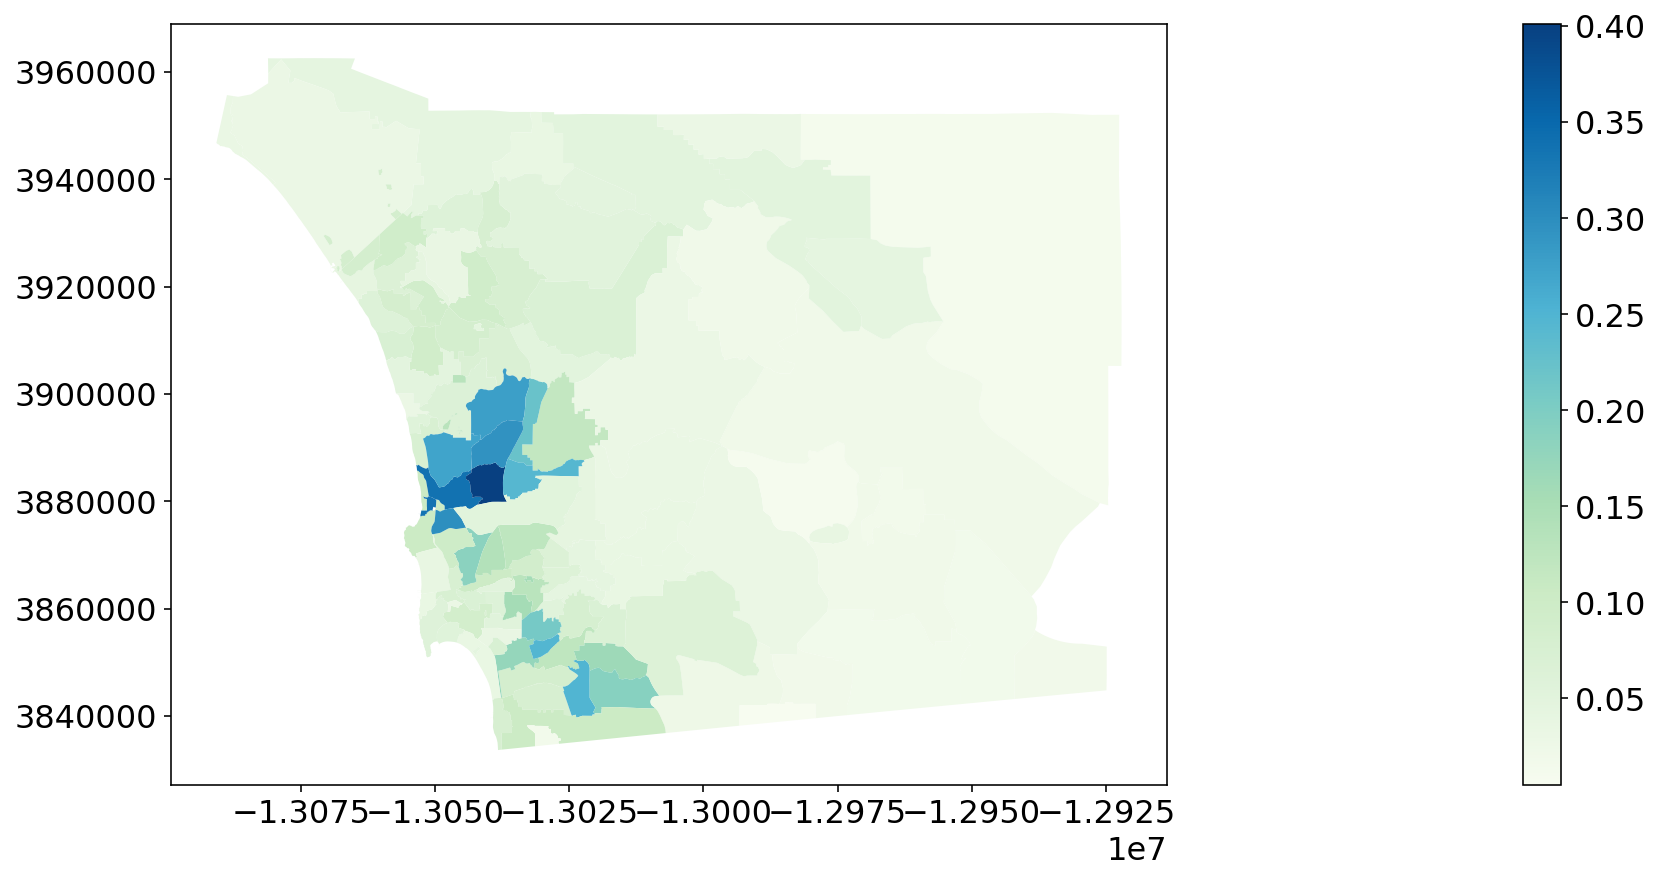

In [18]:
#Black
filepath4 = "CENSUS-Data/Census_ZIP.shp"
tempmap4 = gpd.read_file(filepath4)


fig4, ax4 = plt.subplots(1, 1, figsize=(17, 7))
divider4 = make_axes_locatable(ax4)
sdmap4= pd.merge(tempmap4, ethB, on='ZIP', how='left')
sdmap4 = sdmap3.dropna()
sdmap4.plot(column='PROPORTION', ax=ax4, cmap='GnBu', legend=True);

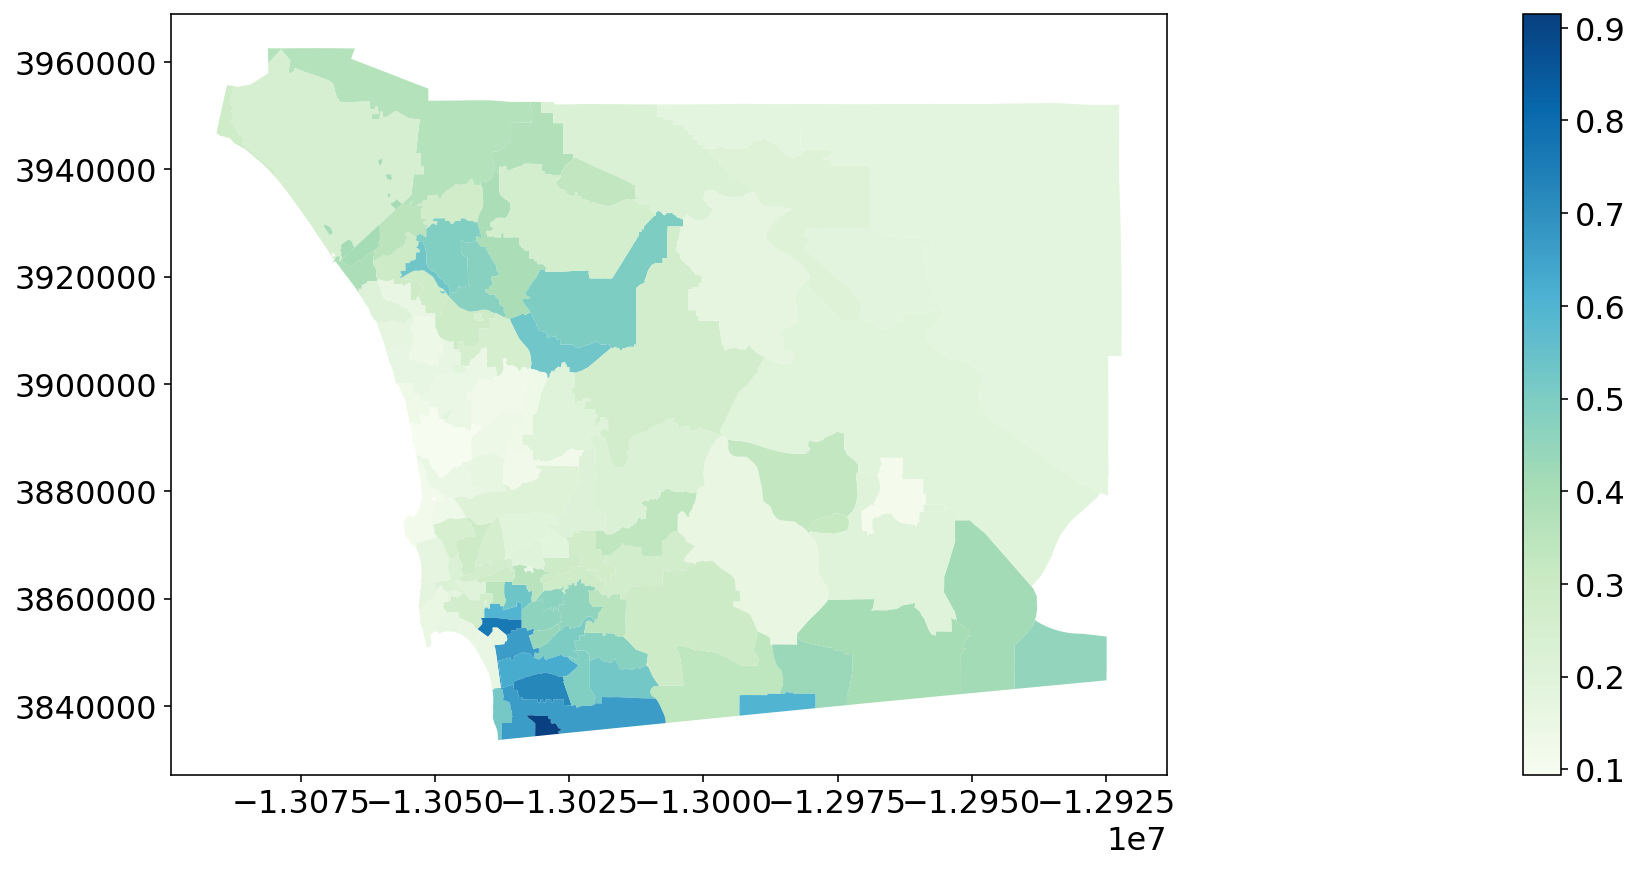

In [19]:
#Hispanic
filepath5 = "CENSUS-Data/Census_ZIP.shp"
tempmap5 = gpd.read_file(filepath5)


fig5, ax5 = plt.subplots(1, 1, figsize=(17, 7))
divider5 = make_axes_locatable(ax5)
sdmap5= pd.merge(tempmap5, ethH, on='ZIP', how='left')
sdmap5 = sdmap5.dropna()
sdmap5.plot(column='PROPORTION', ax=ax5, cmap='GnBu', legend=True);

,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,YEAR,ETHNICITY,POPULATION,PROPORTION
20,21,91962,Pine Valley,3.284238e+09,367824.51541,"POLYGON ((-12970245.349 3883302.756, -12967539...",2018.0,Other,10.0,0.006002


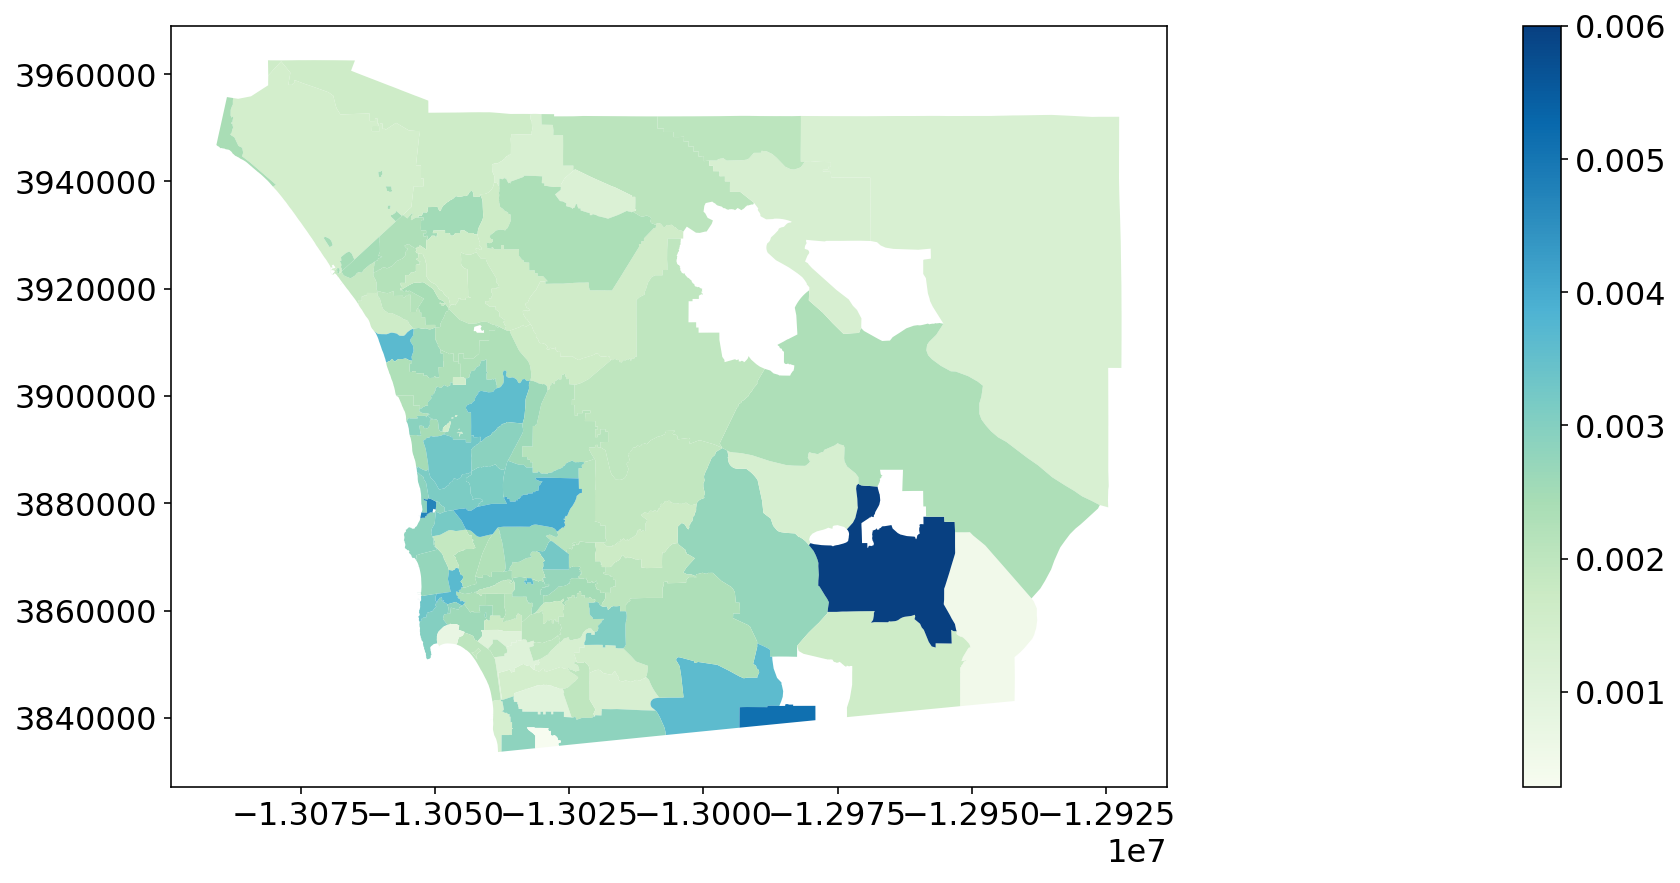

In [20]:
#Other ethnicities is the ethnicities that is not mentioned in the ethnicities column. The ZIP code that has the maximum number of 'other'
#ethnicities is the ZIP cide 91962 - Pine Valley. The racial makeup of Pine Valley is 1,408 (93.2%) 
#White, 6 (0.4%) African American, 6 (0.4%) Native American, Hispanic or Latino of any race-154 people (10.2%)
#16 (1.1%) Asian, 1 (0.1%) Pacific Islander, 20 (1.3%) from other races, and 53 (3.5%) from two or more races.
#though the White population is prominent The population of other races in this zipcode is maximum compared to that of other zipcodes
filepath6 = "CENSUS-Data/Census_ZIP.shp"
tempmap6 = gpd.read_file(filepath6)


fig6, ax6 = plt.subplots(1, 1, figsize=(17, 7))
divider6 = make_axes_locatable(ax6)
sdmap6= pd.merge(tempmap6, ethO, on='ZIP', how='left')
sdmap6 = sdmap6.dropna()
sdmap6.plot(column='PROPORTION', ax=ax6, cmap='GnBu', legend=True);
val = sdmap6[sdmap6['PROPORTION'] == sdmap6['PROPORTION'].max() ]
val

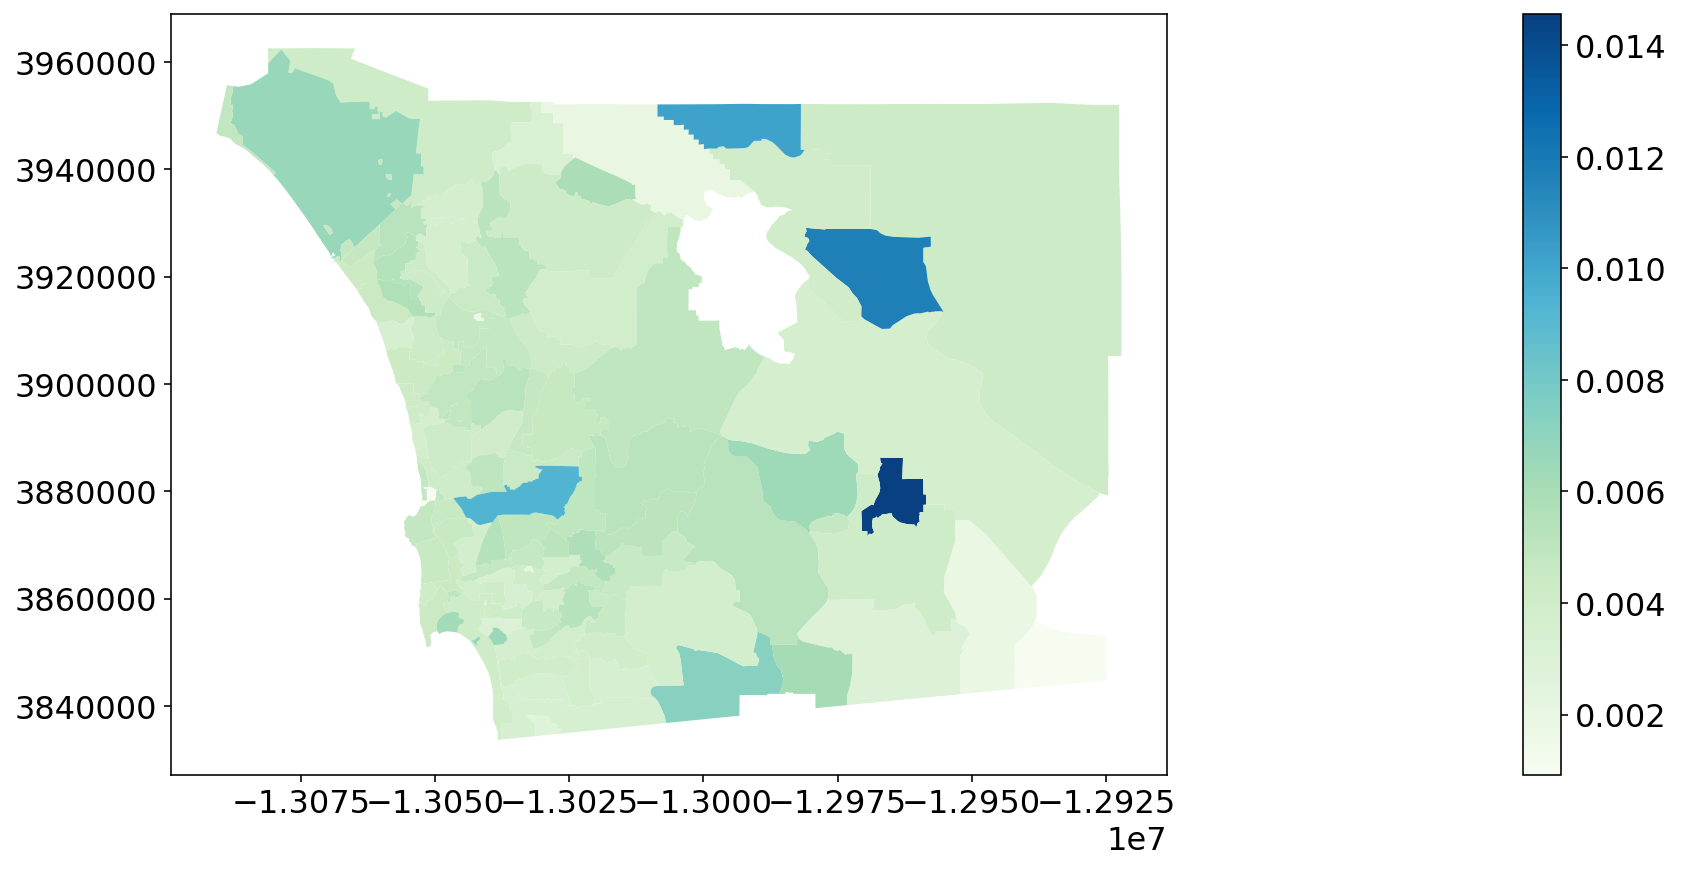

In [21]:
filepath7 = "CENSUS-Data/Census_ZIP.shp"
tempmap7 = gpd.read_file(filepath7)


fig7, ax7 = plt.subplots(1, 1, figsize=(17, 7))
divider7 = make_axes_locatable(ax7)
sdmap7= pd.merge(tempmap7, ethPI, on='ZIP', how='left')
sdmap7 = sdmap7.dropna()
sdmap7.plot(column='PROPORTION', ax=ax7, cmap='GnBu', legend=True);

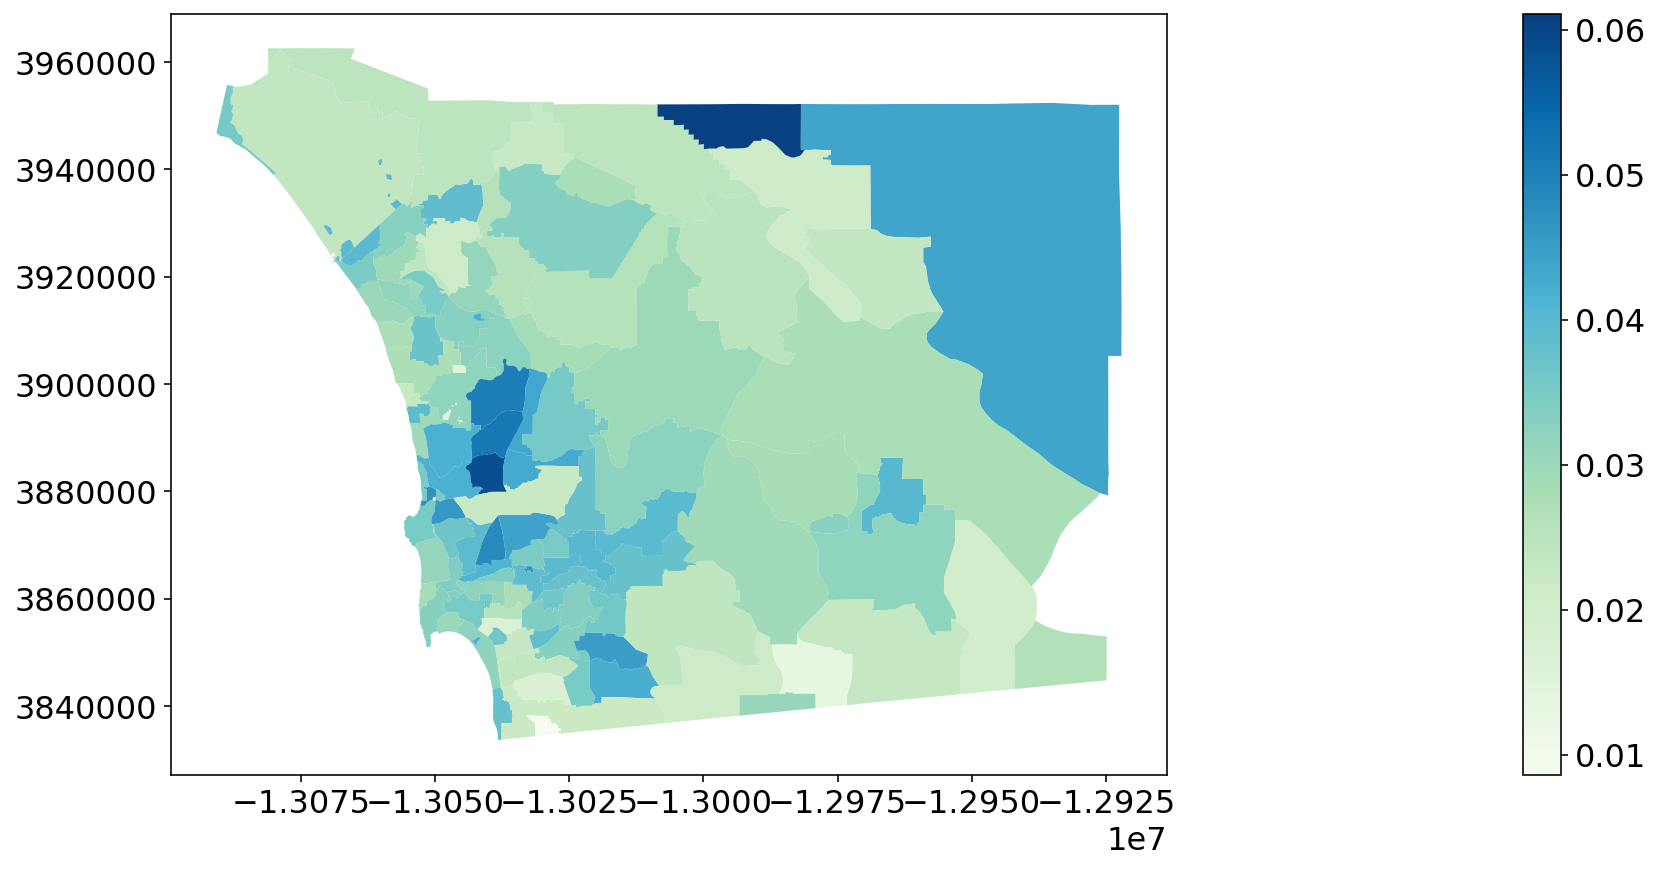

In [22]:
filepath8 = "CENSUS-Data/Census_ZIP.shp"
tempmap8 = gpd.read_file(filepath8)


fig8, ax8 = plt.subplots(1, 1, figsize=(17, 7))
divider8 = make_axes_locatable(ax8)
sdmap8= pd.merge(tempmap8, ethTM, on='ZIP', how='left')
sdmap8 = sdmap8.dropna()
sdmap8.plot(column='PROPORTION', ax=ax8, cmap='GnBu', legend=True);

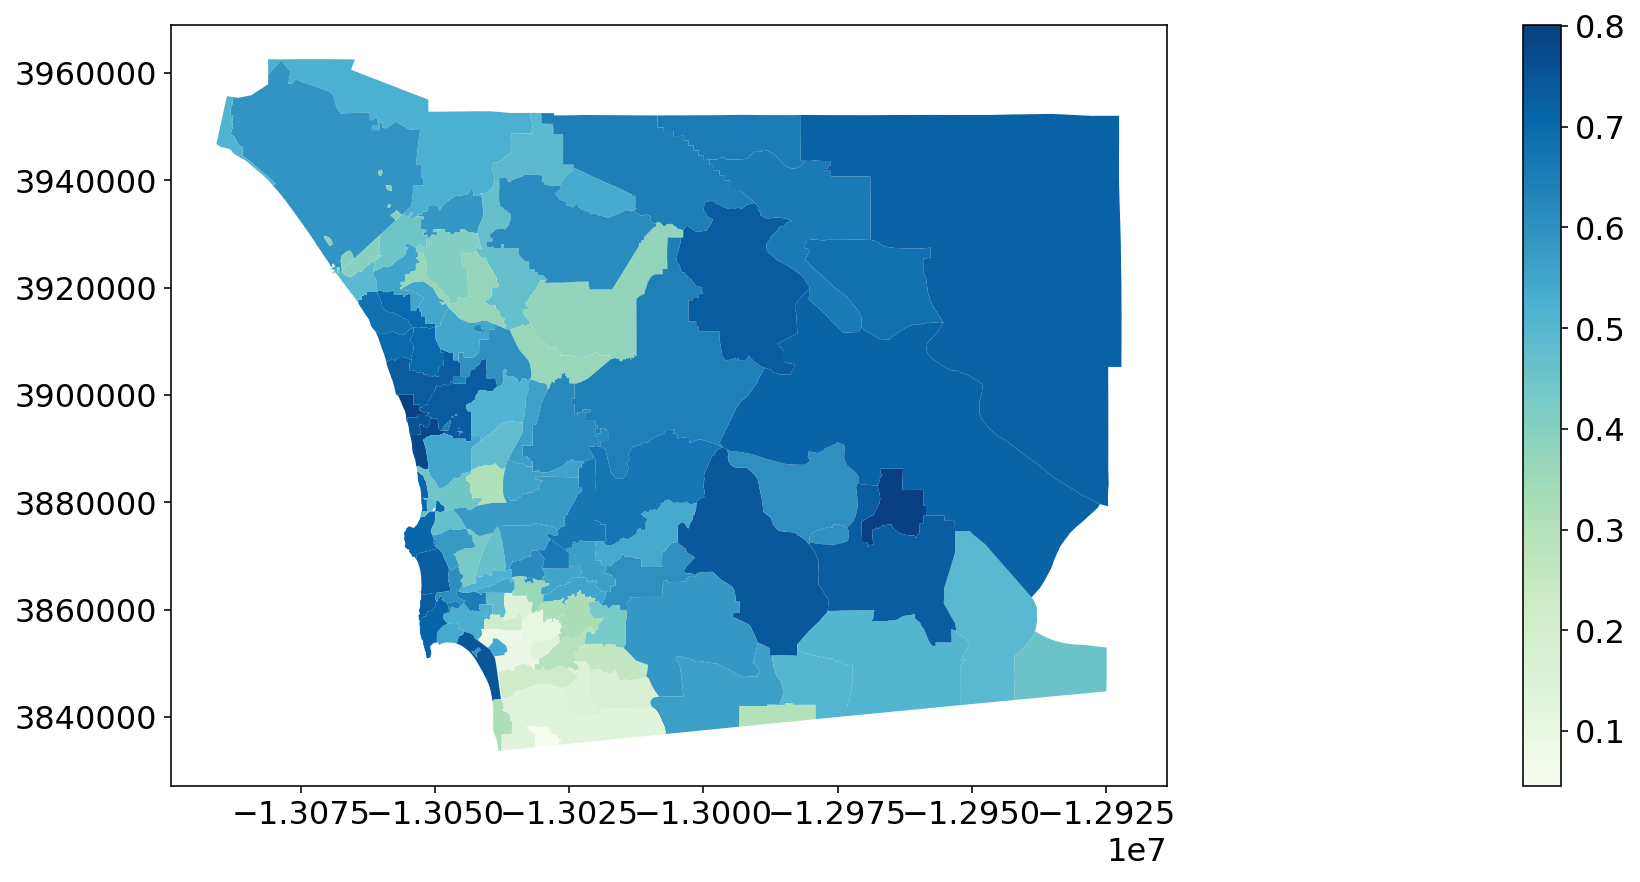

In [23]:
filepath9 = "CENSUS-Data/Census_ZIP.shp"
tempmap9 = gpd.read_file(filepath9)


fig9, ax9 = plt.subplots(1, 1, figsize=(17, 7))
divider9 = make_axes_locatable(ax9)
sdmap9= pd.merge(tempmap9, ethW, on='ZIP', how='left')
sdmap9 = sdmap9.dropna()
sdmap9.plot(column='PROPORTION', ax=ax9, cmap='GnBu', legend=True);